In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [16]:
dfmovies= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\A-ETLconsignas\MoviesSMALL.csv')

In [17]:
#Me traigo DF que cree a partir del Dataset original luego del ETL y sin las columnas que desanide
dfmovies.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,title,release_year,return
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,1995.0,12.451801


In [18]:
# Aplico describe para la descripcion estadistica de los features basicos numericos 
dfmovies.describe()

,budget,id,popularity,revenue,runtime,release_year,return
count,4.493600e+04,44936.000000,44936.000000,4.493600e+04,44696.000000,44936.000000,1.087900e+04
mean,4.272523e+06,107770.449528,2.943997,1.133855e+07,94.315330,1991.819677,inf
std,1.751999e+07,112016.117651,6.027463,6.469487e+07,38.300509,24.072588,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26173.750000,0.394106,0.000000e+00,85.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59522.000000,1.138982,0.000000e+00,95.000000,2001.000000,1.280000e+00
75%,0.000000e+00,156598.500000,3.740277,0.000000e+00,107.000000,2010.000000,7.267949e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,2017.000000,inf


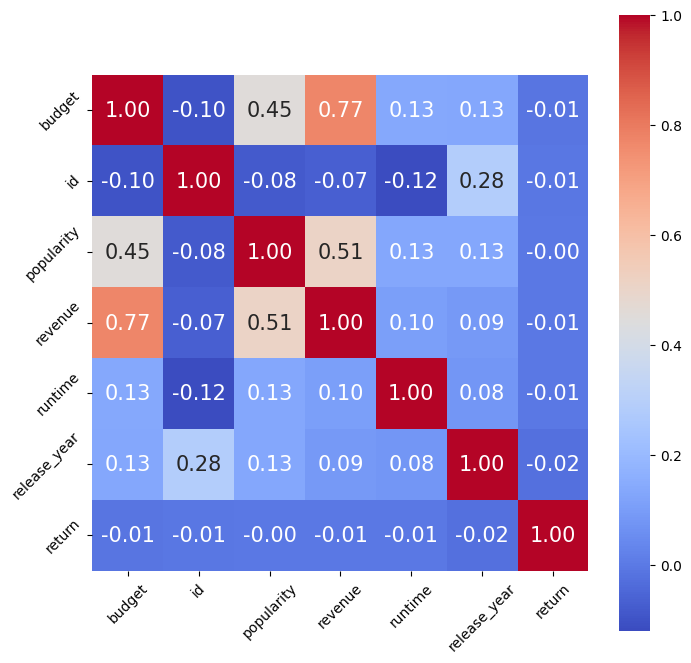

In [19]:
# Tomo solamente las variables numericas del DF que me quedo luego del ETL inicial y las coloco en un HEATMAP
# Para hacer matriz de correlacion entre variables
columnaselim=['overview','title', 'original_language', 'release_date']

corr = dfmovies.drop(columns=columnaselim).corr()  #is used for find corelation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= dfmovies.drop(columns = columnaselim).columns, 
           yticklabels= dfmovies.drop(columns = columnaselim).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

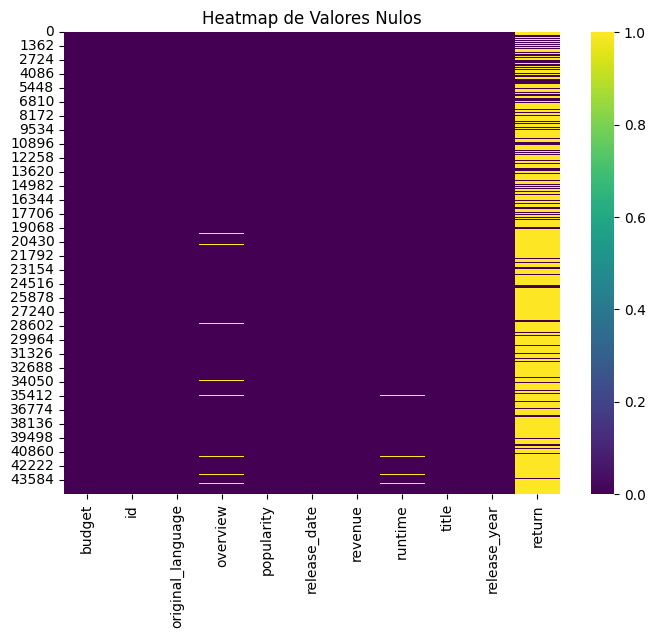

In [20]:
# Utilizo heat map tambien para ver valores nulos. En la columnsa que mas hay es en RETURN
plt.figure(figsize=(8, 6))  
sns.heatmap(dfmovies.isnull(), cmap='viridis') 
plt.title('Heatmap de Valores Nulos')  
plt.show()

In [21]:
# reemplazo nulos por cero
dfmovies1 = dfmovies.replace(np.nan,' ', regex=True)

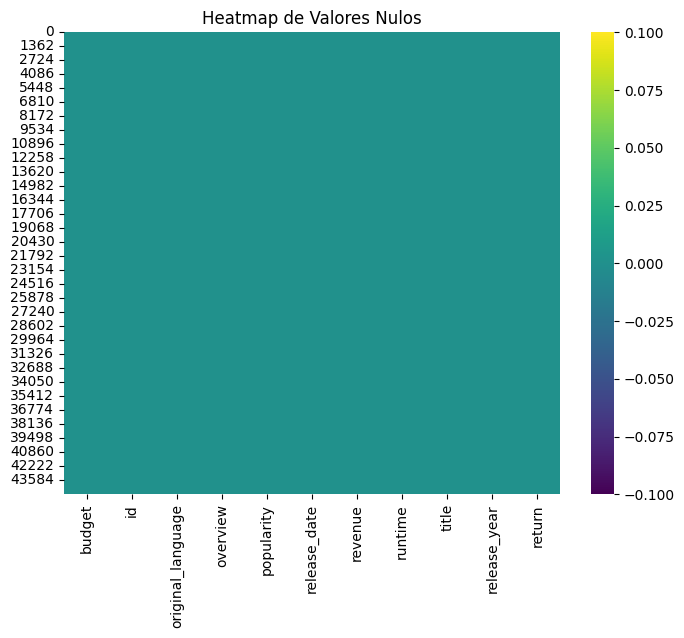

In [23]:
# Vuelvo a dibujar el heat map sin nulos
plt.figure(figsize=(8, 6))  
sns.heatmap(dfmovies1.isnull(), cmap='viridis') 
plt.title('Heatmap de Valores Nulos')  
plt.show()

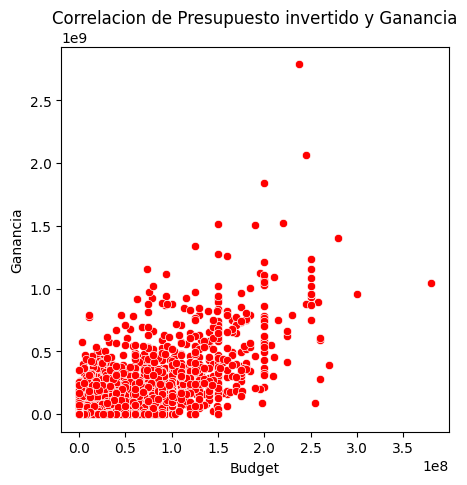

In [25]:
# Creo un scatterplot de la variable 'budget' asociada a 'revenue' 
plt.figure(figsize=(5,5))
sns.scatterplot(data=dfmovies, x='budget',y='revenue', color='red')

# Personalizar el gráfico
plt.title('Correlacion de Presupuesto invertido y Ganancia')
plt.xlabel('Budget')
plt.ylabel('Ganancia')

# Mostrar el gráfico
plt.show()

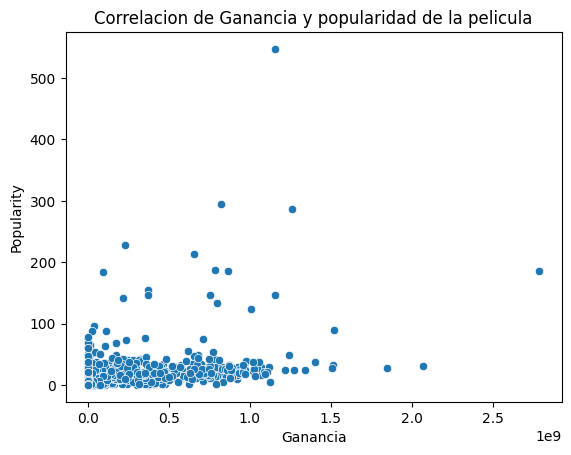

In [26]:
# Crear un scatterplot de la variable 'budget' asociada a 'popularity' 
sns.scatterplot(data=dfmovies, x='revenue',y='popularity')

# Personalizar el gráfico
plt.title('Correlacion de Ganancia y popularidad de la pelicula')
plt.xlabel('Ganancia')
plt.ylabel('Popularity')

# Mostrar el gráfico
plt.show()

In [27]:
# Me fijo cuales son las peliculas mas populares
df_movies_sorted = dfmovies.sort_values(by='popularity', ascending=False)

# Seleccionar las 50 películas más populares
top_50_populares = df_movies_sorted.head(50)

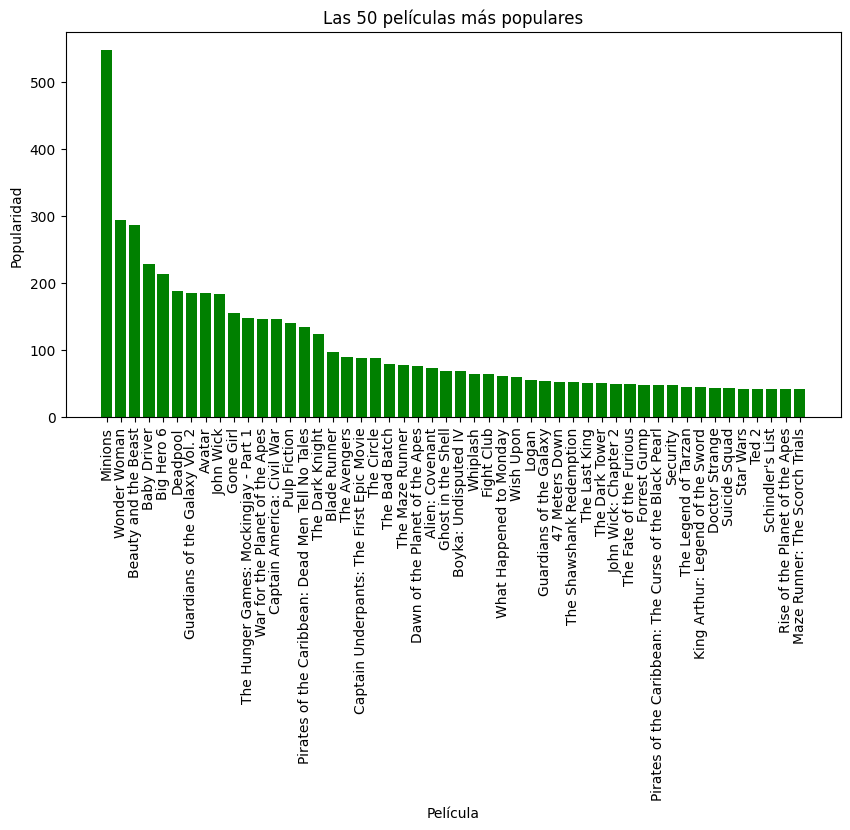

In [29]:
# Realizo gráfico de barras para las 50 películas más populares
plt.figure(figsize=(10,5))
plt.bar(df_movies_sorted['title'].head(50), df_movies_sorted['popularity'].head(50), color='green')
plt.xticks(rotation=90)
plt.xlabel('Película')
plt.ylabel('Popularidad')
plt.title('Las 50 películas más populares')
plt.show()

In [30]:
dfpeliporaños= dfmovies[['release_year', 'id']].groupby('release_year').count().reset_index()
dfpeliporaños.head()

,release_year,id
0,1874.0,1
1,1878.0,1
2,1883.0,1
3,1887.0,1
4,1888.0,2


In [31]:
## elimino los datos de release_year que sean menor a 1895, que es cuando comenzo el cine
dfpeliporaños = dfpeliporaños[dfpeliporaños['release_year'] > 1894.0]

In [32]:
# Me fijo en que año hay mas peliculas, y lo grafico luego
dfpeliporaños.sort_values(by='id', ascending=False)

,release_year,id
129,2014.0,1962
128,2013.0,1881
130,2015.0,1874
127,2012.0,1708
126,2011.0,1645
...,...,...
23,1908.0,6
26,1911.0,6
14,1899.0,5
20,1905.0,4


<Axes: xlabel='release_year', ylabel='id'>

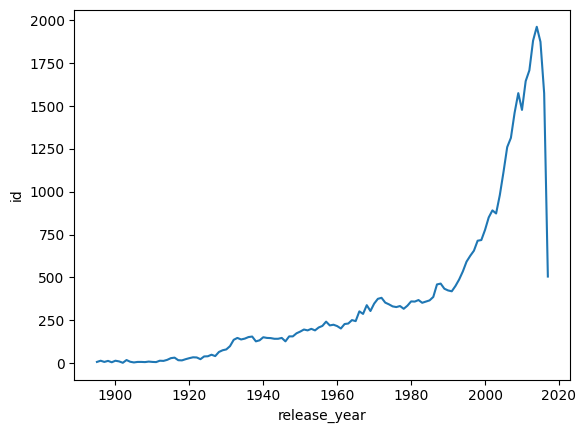

In [33]:
""" Miro la cantidad de peliculas por año y veo que mas o menos para el 2000 hay un boom de aumento de produccion de 
 peliculas, que segun el punto anterior el maximo es en 2014 con 1962 peliculas y luego cae el valor, con el las ultimas en 2017"""
sns.lineplot(data=dfpeliporaños, x='release_year', y= 'id')

In [34]:
dfpeliporaños.tail()

,release_year,id
128,2013.0,1881
129,2014.0,1962
130,2015.0,1874
131,2016.0,1574
132,2017.0,505


In [37]:
dfgeneros= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\GenerosFinalPORid.csv')

In [38]:
## uno el dfmovies con el de generos para graficar los generos mas populares
union= pd.merge(dfmovies, dfgeneros, on='id', how='left')

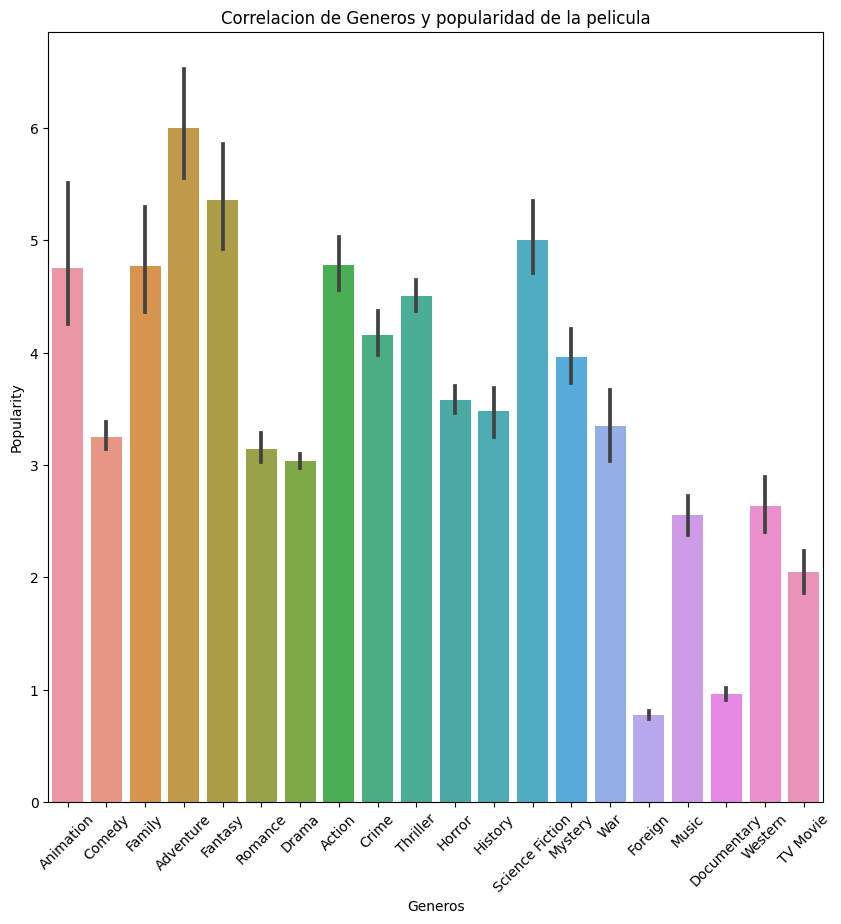

In [39]:
# Creamos un grafico de barras para ver la relacion entre la variable 'genero' asociada a 'popularidad' 
plt.figure(figsize=(10,10))
sns.barplot(data=union, x='name_genres',y='popularity')

# Personalizar el gráfico
plt.title('Correlacion de Generos y popularidad de la pelicula')
plt.xticks(rotation=45)
plt.xlabel('Generos')
plt.ylabel('Popularity')

# Mostrar el gráfico
plt.show()

In [ ]:
## Vemos que los generos mas populares son Adventure, Fantasy, Science Fiction, y luego Animation, Family y Action. 

In [40]:
df_director= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\DirectorFUNCION.csv')
df_director.head(1)

,name,budget,release_date,revenue,title,return,return_dire
0,John Lasseter,30000000.0,1995-10-30,373554033.0,Toy Story,12.451801,27.654378


In [41]:
# Agrupo los directores que mas peliculas hicieron
df_dir_pelis= df_director[['name', 'title']].groupby('name').count().reset_index()
ordenados= df_dir_pelis.sort_values(by='title', ascending=False)
ordenados.head()

,name,title
4526,Steven Spielberg,31
4525,Steven Soderbergh,26
194,Alfred Hitchcock,24
4004,Ridley Scott,24
4675,Tim Burton,21


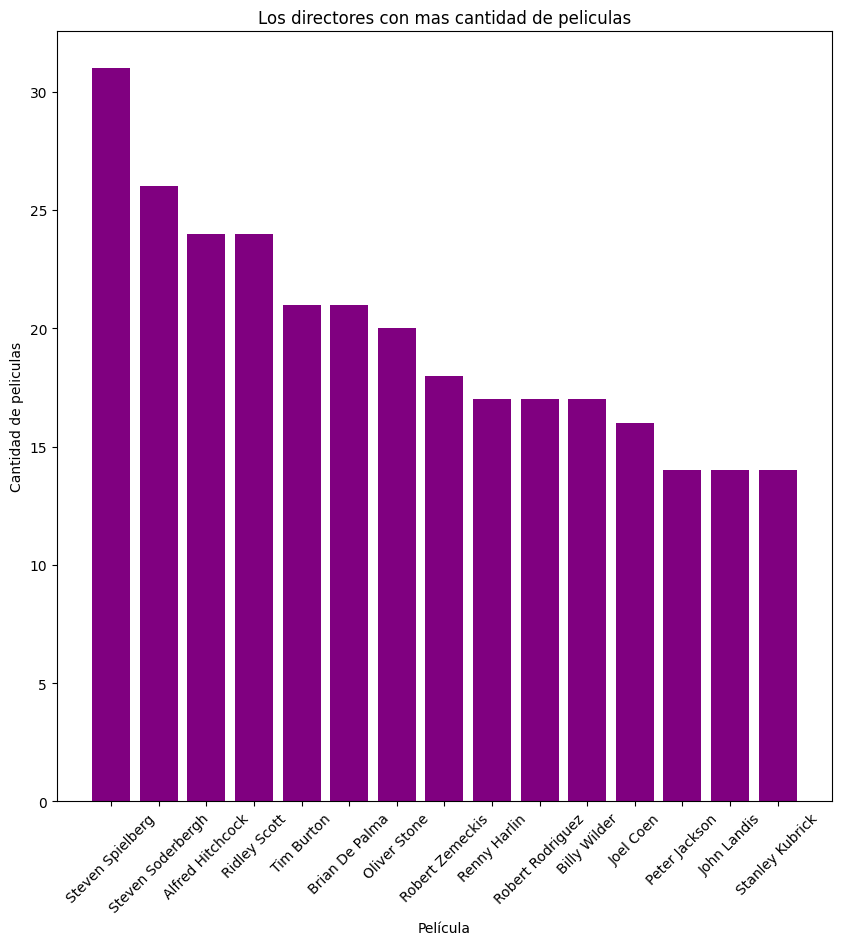

In [42]:
# Realizo gráfico de barras para las 50 películas más populares
plt.figure(figsize=(10,10))
plt.bar(ordenados['name'].head(15), ordenados['title'].head(15), color='purple')
plt.xticks(rotation=45)
plt.xlabel('Película')
plt.ylabel('Cantidad de peliculas')
plt.title('Los directores con mas cantidad de peliculas')
plt.show()

In [58]:
dfprodu= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\ProductorasFuncion.csv')

In [59]:
franquicia2= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\Franquicias.csv')

In [60]:
dfidiomas= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\LenguageCANTIDAD.csv')

In [61]:
dfpaises= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\PaisesCANTpelis.csv')